In [7]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# JSC270 - Class \#2
## Prof. Chevalier
### 13 Jan. 2020

# Today's Class

- Reporting & Storytelling in Data Science
- Asking Research Questions
- Data wrangling
- APIs

# Reporting & Storytelling in Data Science

<br>

<div style="display: table; clear: both;">
  <div style="float: left; width: 50%; padding: 10px; height: 350px;">
    <p><img src='kaggle.png'></td></tr></p>
  </div>
  <div style="float: left; width: 50%; padding: 10px; height: 350px;">
    <p><img src='nyt.png'></p>
  </div>
  
</div>

<br>
<br>

# What is Data Science?

<br>

<center> <h3><i>The science of learning from data. </i></h2></center>

# Formulating Research Questions

- Ask a lot of questions, be critical
- Think about the problem: who? what? how? why? where? when?
- Use answers and findings to ask interesting follow-up questions


> Think about something that you do for yourself that is healthy.


How do you know it's healthy? Is it because somone told you or because of how you feel? If it's because someone told you, how do you know that person is right? Many experts disagree on what's healthy. Which experts are right?

> A shoe company you work for gave out customer coupons and had a one-day sale event at the end of the year. Was the coupon operation profitable?

In [14]:
import csv

df = pd.read_csv('coupons.csv')
df.head()

,id,coupon_code,discount,sku,quantity
0,0,None,1.0,9,3
1,1,coupon80,0.8,9,2
2,2,xmas70,0.7,1,3
3,3,coupon80,0.8,14,3
4,4,None,1.0,4,4


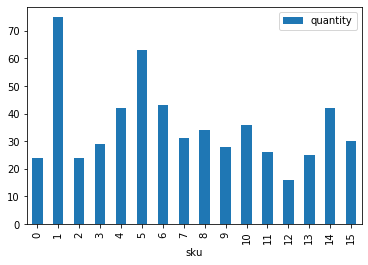

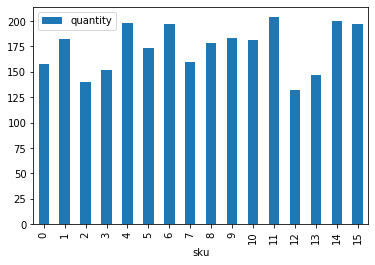

In [18]:
none = df[df.coupon_code == 'None']
none_count = none.groupby('sku').sum()[['quantity']]

coupon80 = df[df.coupon_code != 'None']
coupon80_count = coupon80.groupby('sku').sum()[['quantity']]

none_count.plot(kind='bar') 
coupon80_count.plot(kind='bar') 

In [16]:
df.coupon_code.unique()

array(['None', 'coupon80', 'xmas70', 'freeshipping', 'happynewyear60',
       'family75'], dtype=object)

<BarContainer object of 5 artists>

[Text(0, 0, 'coupon80'),
 Text(0, 0, 'family75'),
 Text(0, 0, 'freeshipping'),
 Text(0, 0, 'happynewyear60'),
 Text(0, 0, 'xmas70')]

Text(0.5, 1.0, 'average sales quantity comparing with no coupon code')

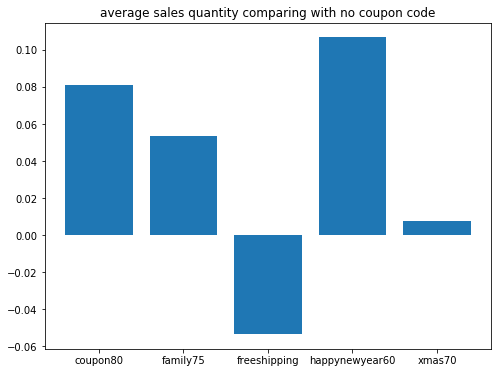

In [11]:
import matplotlib
import seaborn as sns
import numpy as np

f, ax = plt.subplots(1, figsize=(8,6))

pvt = df.pivot_table(index='sku', columns='coupon_code', values='quantity', aggfunc=np.mean)
df2 = pd.DataFrame((pvt.values - pvt.values[:,0:1])[:,1:], columns=pvt.columns[1:])
ax.bar(x=np.arange(5), height=df2.mean())
ax.set_xticks(np.arange(5));
ax.set_xticklabels(df2.columns);

ax.set_title('average sales quantity comparing with no coupon code')

Example from Doug Brose. [MIT Licence](https://github.com/dougbrose/data-science/blob/master/LICENSE).

# Asking Research Questions: Challenge the conclusions

- How do we know that the jump in revenue was related to the promotion? 
- What data would show a strong connection between the promotion and sales?
- Do the promotions work?

- Did customer buy things that were on sale?
- Was it simply a matter of bringing more people to the web site?

# Asking Good Research Questions: Clarify key terms

<br>

> Do people run often because it makes them happier?

# Asking Good Research Questions: Root out assumptions

<br>

> After examination of customer service data, a company's analysts realize that the company has a high percentage of people calling in to order products. The company wants to encourage customer to use the web site or mobile app.

> * Why are people calling in?
> * What can we do to make the website easier for customer to use? 
> * How do we get more customers to use our mobile application?
> * Why do customer prefer to talk to a person?



<center>
<div style="display: table; clear: both;">
  <div style="float: left; width: 50%; padding: 10px; ">
    <p><img src='ask-question.jpg'></td></tr></p>
  </div>
  <div style="float: left; width: 50%; padding: 10px; ">
    <p><img src='think-like-a-freak.jpg'></p>
  </div>
</div>
</center>

# Critical Reasoning


In [1]:
import pandas as pd

df = pd.read_csv('babies.csv', sep=";")
df.columns

Index(['gender', 'couple', 'babies', 'job'], dtype='object')

In [2]:
df["babies"].mean()

1.7083333333333333

In [3]:
df["babies"].median()

1.5

In [4]:
df.head()

,gender,couple,babies,job
0,female,1,2,secretary
1,male,1,2,stewart
2,female,2,1,professor
3,male,2,1,none
4,female,3,2,lawyer


<center>
<div style="display: table; clear: both;">
  <div style="float: left; width: 57%; padding: 10px;">
    <p><img src='field-guide.jpg'></td></tr></p>
  </div>
  <div style="float: left; width: 43%; padding: 10px;">
    <p><img src='stats-done-wrong.png'></p>
  </div>
</div>
</center>

# Data Wrangling

- Data wrangling/manipulation/transformation has a large impact on the data used to answer questions with data.

- Statistical and machine learning models are meaningful only if the data is meaningful.

- Data wrangling/manipulation is one point in the data analysis process where decisions can introduce bias into the data.  Examples?

<a href='https://www.nytimes.com/interactive/2019/01/11/us/politics/trump-border-crisis-reality.html'> <img src='nyttrump.png'> </img> </a>

<img src="legal-immigration.png" style="width: 70%;"></img>

<img src="nyttrumpfull.png" style="width: 60%;"></img>

# Top 10 Lists from criterion.com

The following list contains all top 10 lists from criterion.com, extracted computationnally with beautifulsoup (see Class 1)



In [11]:
import pandas as pd

df = pd.read_csv('top10-lists.csv')
df.shape
df[265:275]

,author,director,ranks,title
265,Ari Aster’s Top10,Kenji Mizoguchi,2,Ugetsu
266,Ari Aster’s Top10,Kenji Mizoguchi,2,Sansho the Bailiff
267,Ari Aster’s Top10,Kenji Mizoguchi,2,The Life of Oharu
268,Ari Aster’s Top10,Martin Scorsese,3,The Age of Innocence
269,Ari Aster’s Top10,Andrew Haigh,3,45 Years
270,Ari Aster’s Top10,Federico Fellini,4,8½
271,Ari Aster’s Top10,Mike Leigh,5,Topsy-Turvy
272,Ari Aster’s Top10,Mike Leigh,5,Naked
273,Ari Aster’s Top10,Michael Powell and Emeric Pressburger,6,The Red Shoes
274,Ari Aster’s Top10,Michael Powell and Emeric Pressburger,6,The Life and Death of Colonel Blimp


Is the data usable as is?

# pandas

# Series

A Series is a one-dimensional array-like object containing a sequence of values (of similar types to NumPy types) and an associated array of data labels, called its index. The simplest Series is formed from only an array of data.

In [209]:
import pandas as pd

myseries = pd.Series([8.4, 6.11, 53.4, 20.1])
print(myseries)
movies = ['All About Eve', 'A Woman Under the Influence', 'RoboCop', 'Mulholland Dr.']
myseries.index = movies
myseries

0     8.40
1     6.11
2    53.40
3    20.10
dtype: float64


All About Eve                   8.40
A Woman Under the Influence     6.11
RoboCop                        53.40
Mulholland Dr.                 20.10
dtype: float64

# pandas DataFrame

- A DataFrame represents a rectangular table of data and contains an ordered collection of columns, each of which can be a different value type (numeric, string, boolean, etc.). 

- The DataFrame has both a row and column index; it can be thought of as a dict of Series all sharing the same index.

- Under the hood, the data is stored as one or more two-dimensional blocks rather than a list, dict, or some other collection of one-dimensional arrays. 

(McKinney, 2018 and [pandas ref](https://pandas.pydata.org))

In [210]:
# a dict of equal length lists
movies = {'movie':['All About Eve', 'A Woman Under the Influence', 'RoboCop', 'Mulholland Dr.'], 
          'box_office': [8.4, 6.11, 53.4, 20.1],
         'year': [1950, 1974, 1987, 2001]}
df = pd.DataFrame(movies)
df

,movie,box_office,year
0,All About Eve,8.40,1950
1,A Woman Under the Influence,6.11,1974
2,RoboCop,53.40,1987
3,Mulholland Dr.,20.10,2001


- pandas can read and write data in many types of formats (text, binary, SQL) that are stored as csv, json, html, etc.  (see [IO tools](http://pandas.pydata.org/pandas-docs/stable/io.html) )

- For example, `read_html` accepts an HTML string/file/URL and will parse an HTML tables into a list of pandas DataFrames.

In [25]:
url = 'https://en.wikipedia.org/wiki/List_of_highest-grossing_films'
df = pd.read_html(url, header=0)
movies = df[1]  # select table of movies
movies.head()

,Rank,Title,Worldwide gross (2019 $),Year
0,1,Gone with the Wind,"$3,713,000,000",1939
1,2,Avatar,"$3,263,000,000",2009
2,3,Titanic,"T$3,087,000,000",1997
3,4,Star Wars,"$3,049,000,000",1977
4,5,Avengers: Endgame,"AE$2,798,000,000",2019


# Filtering rows (observations)

- Select the top 10 movies.

- `movies[0:10]` retains only the top 10 rows.

- This uses the "slice" syntax.

In [212]:
movies[0:10]

,Rank,Title,Worldwide gross (2019 $),Year
0,1,Gone with the Wind,"$3,713,000,000",1939
1,2,Avatar,"$3,263,000,000",2009
2,3,Titanic,"T$3,087,000,000",1997
3,4,Star Wars: Episode IV – A New Hope,"$3,049,000,000",1977
4,5,Avengers: Endgame,"AE$2,798,000,000",2019
5,6,The Sound of Music,"$2,554,000,000",1965
6,7,E.T. the Extra-Terrestrial,"$2,493,000,000",1982
7,8,The Ten Commandments,"$2,361,000,000",1956
8,9,Doctor Zhivago,"$2,238,000,000",1965
9,10,Star Wars: Episode VII – The Force Awakens,"$2,206,000,000",2015


**Exercise:** 
- Remove the top row
- Retain the movies ranked between 5 and 10 only

Use `.loc` to select by row index and column name.  What is the title of the movie of rank 10?

In [213]:
movies.loc[9, 'Title']

'Star Wars: Episode VII – The Force Awakens'

Modify values in place using `.loc`.

In [29]:
## Write the code to replace the title of the movie at row index 9 with "Star Wars VII"

movies.loc[9, 'Title'] = "Star Wars VII"
movies.loc[9, 'Title']

'Star Wars VII'

We can also select rows using integers with `iloc`.  The 2nd column has index value 1.

In [30]:
## Write the code to access row index 9 and column title, using indexes only

movies.iloc[9, 1]

'Star Wars VII'

We can also use boolean logic to select rows.

In [33]:
# Extend the code to keep only movies whose year is also before 2000.

movies[(pd.to_numeric(movies['Year']) >= 1950)  &  (pd.to_numeric(movies['Year']) < 2000)]

,Rank,Title,Worldwide gross (2019 $),Year
2,3,Titanic,"T$3,087,000,000",1997
3,4,Star Wars,"$3,049,000,000",1977
5,6,The Sound of Music,"$2,554,000,000",1965
6,7,E.T. the Extra-Terrestrial,"$2,493,000,000",1982
7,8,The Ten Commandments,"$2,361,000,000",1956
8,9,Doctor Zhivago,"$2,238,000,000",1965


# Selecting variables (columns)


- `movies['Title']` returns a pandas series (i.e., data frame with one column).

In [216]:
movies['Title'].head()

0                    Gone with the Wind
1                                Avatar
2                               Titanic
3    Star Wars: Episode IV – A New Hope
4                     Avengers: Endgame
Name: Title, dtype: object

# Creating New Variables

Suppose we want to add a new variable to the data frame to indicate if a movie's gross is over $2.5 millions.

In [35]:
# We start by renaming the coloum

movies.rename(columns={'Worldwide gross (2019 $)':'Gross'}, 
                 inplace=True)
movies.columns

Index(['Rank', 'Title', 'Gross', 'Year'], dtype='object')

In [36]:
movies['Gross'].describe()

count                  10
unique                 10
top       T$3,087,000,000
freq                    1
Name: Gross, dtype: object

In [47]:
movies['Gross'] = (movies['Gross']
 .replace('\$|,|T|AE','', regex = True)   # remove unwanted characters
 .astype(int))                            # set the type to integer


In [48]:
movies[movies['Gross'] >= 2500000]

,Rank,Title,Gross,Year
0,1,Gone with the Wind,3713000000,1939
1,2,Avatar,3263000000,2009
2,3,Titanic,3087000000,1997
3,4,Star Wars,3049000000,1977
4,5,Avengers: Endgame,2798000000,2019
5,6,The Sound of Music,2554000000,1965
6,7,E.T. the Extra-Terrestrial,2493000000,1982
7,8,The Ten Commandments,2361000000,1956
8,9,Doctor Zhivago,2238000000,1965
9,10,Star Wars VII,2206000000,2015


# Movies in 2019

**Questions:** 

- What is the distribution of box office revenue in 2019 for American Movies?
- What are the genres generating the most revenue?
- Is there a relationship between the ratings from imdb and metacritic? 

The Wikipedia page [American films of 2019](https://en.wikipedia.org/wiki/List_of_American_films_of_2019) lists American films in 2019.

<img src='film-2019.png' height="500" width="600" ></img>


In [49]:
import pandas as pd
url = 'https://en.wikipedia.org/wiki/List_of_American_films_of_2019'
df = pd.read_html(url, attrs = {"class":"wikitable sortable"})
df[0].head(4)

,Opening,Opening.1,Title,Production company,Cast and crew,Genre,Ref.
0,JANUARY,4,Escape Room,Columbia Pictures,"Adam Robitel (director); Bragi F. Schut, Maria...","Horror, Thriller, Mystery",[2]
1,JANUARY,4,Rust Creek,IFC Films,Jen McGowan (director); Julie Lipson (screenpl...,"Drama, Thriller, Horror",[3]
2,JANUARY,4,American Hangman,Hangman Justice Productions,Wilson Coneybeare (director/screenplay); Donal...,Thriller,[4]
3,JANUARY,11,A Dog's Way Home,Columbia Pictures,Charles Martin Smith (director); W. Bruce Came...,"Drama, Family",[5]


**Exercise:** Extract all of the genres listed in the table.

# Movies awarded a Palme d'Or

The Wikipedia Page [Palme d'Or](https://en.wikipedia.org/wiki/Palme_d%27Or) lists Palme d'Or-winning films.

<img src='plamedor.png' height="500" width="600" ></img>

In [12]:
url = 'https://en.wikipedia.org/wiki/Palme_d%27Or'
df = pd.read_html(url, header=0)
movies = df[1]  # select table of movies
movies.head(10)

,Year,Film,Original title,Director(s),Country
0,1930s,1930s,1930s,1930s,1930s
1,"Awarded as ""Grand Prix du Festival Internation...","Awarded as ""Grand Prix du Festival Internation...","Awarded as ""Grand Prix du Festival Internation...","Awarded as ""Grand Prix du Festival Internation...","Awarded as ""Grand Prix du Festival Internation..."
2,1939 ‡,Union Pacific,Union Pacific,Cecil B. DeMille,USA
3,1940s,1940s,1940s,1940s,1940s
4,1940–1945,No awards due to World War II.,No awards due to World War II.,No awards due to World War II.,No awards due to World War II.
5,1946,The Turning Point,Velikij perelom / Великий перелом,Fridrikh Ermler,USSR
6,1946,Men Without Wings,Muži bez křídel,František Čáp,Czechoslovakia
7,1946,The Last Chance,Die Letzte Chance,Leopold Lindtberg,Switzerland
8,1946,Torment,Hets,Alf Sjöberg,Sweden
9,1946,Portrait of Maria,María Candelaria,Emilio Fernández,Mexico


- `read_html` didn't parse the table properly.

>Expect to do some cleanup after you call this function. For example, you might need to manually assign column names if the column names are converted to NaN when you pass the header=0 argument. We try to assume as little as possible about the structure of the table and push the idiosyncrasies of the HTML contained in the table to the user (see `pandas.read_html` [API ref](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_html.html)).

- Cleaning this table requires selecting rows manually. 

In [50]:
# remove the first row
movies[1:]

,Rank,Title,Gross,Year
1,2,Avatar,3263000000,2009
2,3,Titanic,3087000000,1997
3,4,Star Wars,3049000000,1977
4,5,Avengers: Endgame,2798000000,2019
5,6,The Sound of Music,2554000000,1965
6,7,E.T. the Extra-Terrestrial,2493000000,1982
7,8,The Ten Commandments,2361000000,1956
8,9,Doctor Zhivago,2238000000,1965
9,10,Star Wars VII,2206000000,2015


In [234]:
# Remove the rows where Country contains "No awards" & The rows where movie Year != movie name
movies[(~movies.Country.str.contains("No awards")) & (movies.Year != movies.Film)]

,Year,Film,Original title,Director(s),Country
2,1939 ‡,Union Pacific,Union Pacific,Cecil B. DeMille,USA
5,1946,The Turning Point,Velikij perelom / Великий перелом,Fridrikh Ermler,USSR
6,1946,Men Without Wings,Muži bez křídel,František Čáp,Czechoslovakia
7,1946,The Last Chance,Die Letzte Chance,Leopold Lindtberg,Switzerland
8,1946,Torment,Hets,Alf Sjöberg,Sweden
...,...,...,...,...,...
102,2015,Dheepan,Dheepan,Jacques Audiard,France
103,2016,"I, Daniel Blake","I, Daniel Blake",Ken Loach,United Kingdom France
104,2017,The Square,The Square,Ruben Östlund,Sweden Germany France Denmark
105,2018,Shoplifters,Manbiki kazoku / 万引き家族,Hirokazu Kore-eda,Japan


# Award-winning movies

The Wikipedia Page [Cannes Film Festival Award for Best Director](https://en.wikipedia.org/wiki/Cannes_Film_Festival_Award_for_Best_Director) lists award-winning movies for best director.

<img src='cannes.png' height="500" width="600" ></img>

In [151]:
url = 'https://en.wikipedia.org/wiki/Cannes_Film_Festival_Award_for_Best_Director'
df = pd.read_html(url, header=0)
awards = df[0]  # select table of movies
awards.head()

,Year,Director,Film,Original Title,Country
0,1940s,1940s,1940s,1940s,1940s
1,1946,René Clément,The Battle of the Rails,La Bataille du rail,France
2,1947,no award,no award,no award,no award
3,1949,René Clément,The Walls of Malapaga,Au-delà des grilles,France
4,1950s,1950s,1950s,1950s,1950s


In [146]:
# we just want the movie names
from urllib.request import urlopen
from bs4 import BeautifulSoup

webpage = 'https://en.wikipedia.org/wiki/Cannes_Film_Festival_Award_for_Best_Director'
page = urlopen(webpage)
soup = BeautifulSoup(page, 'html.parser')

# css selection 
# select all <i> tag elements within <td> within <tr> elements 
# within <tbody> elements see 
# https://www.w3schools.com/cssref/css_selectors.asp 

movie=soup.select('tbody tr td i') 
type(movie) # returns a list of <i> tag elements on the page

# extract text part of tag using 
# list comprehension
names = [m.get_text() for m in movie] 

# by inspection we see rows 25:291
# correspond to movie names

names

['The Battle of the Rails',
 'La Bataille du rail',
 'The Walls of Malapaga',
 'Au-delà des grilles',
 'The Young and the Damned',
 'Los Olvidados',
 'Fanfan la Tulipe',
 'Rififi',
 'Du rififi chez les hommes',
 'Heroes of Shipka',
 '(Geroi Shipki)',
 'Othello',
 'Отелло',
 'A Man Escaped or: The Wind Bloweth Where It Listeth',
 "Un condamné à mort s'est échappé ou Le vent souffle où il veut",
 'Brink of Life',
 'Nära livet',
 'The 400 Blows',
 'Les Quatre Cents Coups',
 'The Story of the Flaming Years',
 '(Povest plamennykh let)',
 'Forest of the Hanged',
 'Pădurea spânzuraților',
 'Lenin in Poland',
 '(Lenin v Polshe)',
 'Ten Thousand Days',
 'Tízezer nap',
 'Antonio das Mortes',
 'O Dragão da Maldade contra o Santo Guerreiro',
 'All My Compatriots',
 'Všichni dobří rodáci',
 'Leo the Last',
 'Red Psalm',
 'Még kér a nép',
 'Orderers',
 'Les Ordres',
 'Special Section',
 'Section spéciale',
 'Down and Dirty',
 'Brutti, sporchi e cattivi',
 'Empire of Passion',
 'Ai no Bōrei',
 'Days 

<a href="https://pypi.org/project/omdb/"><img src="omdb.png" style="width:75%;"> </img></a>

Install Python package [omdb](https://pypi.org/project/omdb/) using `pip` or access the API directly.

In [175]:
#install omdb using pip

import omdb

API_KEY = '' #fill in your key here

omdb.set_default('apikey', API_KEY)
movie1 = omdb.title('Robocop')
movie1 #returns a dict

{'title': 'RoboCop',
 'year': '1987',
 'rated': 'R',
 'released': '17 Jul 1987',
 'runtime': '102 min',
 'genre': 'Action, Crime, Sci-Fi, Thriller',
 'director': 'Paul Verhoeven',
 'writer': 'Edward Neumeier, Michael Miner',
 'actors': "Peter Weller, Nancy Allen, Dan O'Herlihy, Ronny Cox",
 'plot': 'In a dystopic and crime-ridden Detroit, a terminally wounded cop returns to the force as a powerful cyborg haunted by submerged memories.',
 'language': 'English',
 'country': 'USA',
 'awards': 'Nominated for 2 Oscars. Another 11 wins & 10 nominations.',
 'poster': 'https://m.media-amazon.com/images/M/MV5BZWVlYzU2ZjQtZmNkMi00OTc3LTkwZmYtZDVjNmY4OWFmZGJlXkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_SX300.jpg',
 'ratings': [{'source': 'Internet Movie Database', 'value': '7.5/10'},
  {'source': 'Rotten Tomatoes', 'value': '89%'},
  {'source': 'Metacritic', 'value': '67/100'}],
 'metascore': '67',
 'imdb_rating': '7.5',
 'imdb_votes': '219,592',
 'imdb_id': 'tt0093870',
 'type': 'movie',
 'dvd': '02 Oct 200

In [176]:
print(movie1['actors'], '\n \n', movie1['box_office'])

Peter Weller, Nancy Allen, Dan O'Herlihy, Ronny Cox 
 
 N/A


In [177]:
# easy to import directly into pandas
import pandas as pd
pd.DataFrame(movie1)

,title,year,rated,released,runtime,genre,director,writer,actors,plot,...,metascore,imdb_rating,imdb_votes,imdb_id,type,dvd,box_office,production,website,response
0,RoboCop,1987,R,17 Jul 1987,102 min,"Action, Crime, Sci-Fi, Thriller",Paul Verhoeven,"Edward Neumeier, Michael Miner","Peter Weller, Nancy Allen, Dan O'Herlihy, Ronn...","In a dystopic and crime-ridden Detroit, a term...",...,67,7.5,"219,592",tt0093870,movie,02 Oct 2001,N/A,Orion Pictures Corporation,N/A,True
1,RoboCop,1987,R,17 Jul 1987,102 min,"Action, Crime, Sci-Fi, Thriller",Paul Verhoeven,"Edward Neumeier, Michael Miner","Peter Weller, Nancy Allen, Dan O'Herlihy, Ronn...","In a dystopic and crime-ridden Detroit, a term...",...,67,7.5,"219,592",tt0093870,movie,02 Oct 2001,N/A,Orion Pictures Corporation,N/A,True
2,RoboCop,1987,R,17 Jul 1987,102 min,"Action, Crime, Sci-Fi, Thriller",Paul Verhoeven,"Edward Neumeier, Michael Miner","Peter Weller, Nancy Allen, Dan O'Herlihy, Ronn...","In a dystopic and crime-ridden Detroit, a term...",...,67,7.5,"219,592",tt0093870,movie,02 Oct 2001,N/A,Orion Pictures Corporation,N/A,True
